# PyCaret Model Performance
Contributors:

**Egemen Alkan**: Implemented PyCaret for automated machine learning.
Conducted model comparison, tuning, and evaluation for the Titanic dataset.
Visualized model performance using bar charts and radar charts.
Objective:
Leverage PyCaret's automation to identify the best-performing classification model for predicting survival on the Titanic.

Workflow Summary:

Automated Model Comparison:
Used PyCaret's compare_models function to test multiple algorithms.
Model Tuning and Finalization:
Fine-tuned the best model and finalized it for predictions.
Evaluation and Visualization:
Generated performance metrics such as accuracy, precision, recall, and F1-score.
Visualized performance metrics using bar charts and radar charts for comparison.

## Titanic Survival Prediction Using PyCaret
This code demonstrates how to build and optimize machine learning models to predict Titanic survival using the PyCaret framework. Each step in the pipeline is outlined below:



**1. Import Libraries**

- pandas: For data manipulation and preprocessing.
- pycaret.classification: A module from PyCaret for automating classification tasks such as model selection, tuning, and evaluation.
- matplotlib.pyplot: Used to create plots (not used explicitly here but included for possible future visualization).

In [1]:
import pandas as pd
from pycaret.classification import setup, compare_models, tune_model, finalize_model, predict_model, save_model, plot_model
import matplotlib.pyplot as plt

**2. Load the Titanic Dataset**

- Load the cleaned Titanic dataset from a CSV file.
- The dataset contains passenger information, including demographic details and survival outcomes.

In [2]:
titanic_df = pd.read_csv('../data/titanic_cleaned.csv')

**3. Data Preprocessing**

Drop Irrelevant Columns

- Remove the passengerid column as it is irrelevant to the survival prediction task.


In [3]:
titanic_df = titanic_df.drop(columns=['passengerid'])


**Encode Categorical Variables**


- sex is converted to numerical values: 1 for male and 0 for female.
- embarked (the port where passengers boarded the Titanic) is mapped to numerical values:
    - C: Cherbourg → 0
    - Q: Queenstown → 1
    - S: Southampton → 2

In [4]:
titanic_df['sex'] = titanic_df['sex'].apply(lambda x: 1 if x == 'male' else 0)
titanic_df['embarked'] = titanic_df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})



**Create a New Feature: Marital Status**

- Define "married" status:
    - A passenger is considered married if they have both siblings/spouse (sibsp > 0) and parents/children (parch > 0) traveling with them.
    - married is set to 1 if both conditions are met, otherwise 0.



In [5]:
titanic_df['married'] = ((titanic_df['sibsp'] > 0) & (titanic_df['parch'] > 0)).astype(int)

**4. PyCaret Setup**

- Initialize PyCaret's setup:
    - data: The Titanic dataset.
    - target: The target variable (survived) indicating whether a passenger survived (1) or not (0).
    - session_id: A random seed (42) to ensure reproducibility.
    - fold: Number of cross-validation folds (5 in this case).
    - verbose: Suppress detailed output to keep the logs clean.


In [6]:
clf = setup(data=titanic_df, target='survived', session_id=42, fold=5, verbose=False)

**5. Compare Models**

- Automatically compare multiple machine learning models.
- The comparison is based on metrics such as accuracy, F1 score, AUC, and more.
- The best-performing model is selected and stored in best_model.


In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8250,0.8731,0.7636,0.7742,0.7686,0.6279,0.6282,0.0640
lightgbm,Light Gradient Boosting Machine,0.8231,0.8770,0.7636,0.7719,0.7667,0.6244,0.6255,0.1280
rf,Random Forest Classifier,0.8110,0.8691,0.7773,0.7399,0.7572,0.6028,0.6044,0.0980
ada,Ada Boost Classifier,0.8042,0.8478,0.7727,0.7306,0.7505,0.5896,0.5910,0.0540
et,Extra Trees Classifier,0.8007,0.8499,0.7682,0.7281,0.7458,0.5825,0.5850,0.0840
lr,Logistic Regression,0.8006,0.8519,0.7227,0.7465,0.7336,0.5745,0.5755,1.2180
qda,Quadratic Discriminant Analysis,0.7972,0.8395,0.7682,0.7241,0.7434,0.5764,0.5792,0.0180
ridge,Ridge Classifier,0.7971,0.8517,0.7227,0.7395,0.7303,0.5679,0.5686,0.0200
lda,Linear Discriminant Analysis,0.7954,0.8519,0.7227,0.7362,0.7286,0.5646,0.5654,0.0200
dt,Decision Tree Classifier,0.7937,0.7883,0.7591,0.7217,0.7379,0.5684,0.5711,0.7280


**6. Tune the Best Model**

- Perform hyperparameter tuning on the selected model (best_model).
- PyCaret automatically searches for optimal hyperparameter values to improve the model's performance.


In [8]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8448,0.8902,0.8182,0.7826,0.8000,0.6733,0.6738
1,0.8103,0.8679,0.7955,0.7292,0.7609,0.6042,0.6058
2,0.7739,0.8601,0.6818,0.7143,0.6977,0.5173,0.5176
3,0.8174,0.8608,0.7727,0.7556,0.7640,0.6151,0.6152
4,0.8696,0.9072,0.8182,0.8372,0.8276,0.7227,0.7228
Mean,0.8232,0.8772,0.7773,0.7638,0.7700,0.6265,0.6271
Std,0.0324,0.0185,0.0506,0.0435,0.0437,0.0693,0.0692


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**7. Finalize the Model**

- Finalize the tuned model for deployment.
- This step retrains the model on the entire dataset (training + validation) using the best hyperparameters.



In [9]:
final_model = finalize_model(tuned_model)

**Outcome**
- The final_model is now ready to make predictions on new data.
- Additional steps, such as saving the model (save_model) or evaluating it further (plot_model), can be added as needed.



**8. Evaluate the Model**

8.1 Confusion Matrix

- A confusion matrix is generated using PyCaret's plot_model function to visualize the performance of the model on the test data.
- It shows the number of true positives, true negatives, false positives, and false negatives, helping to evaluate the classification accuracy.



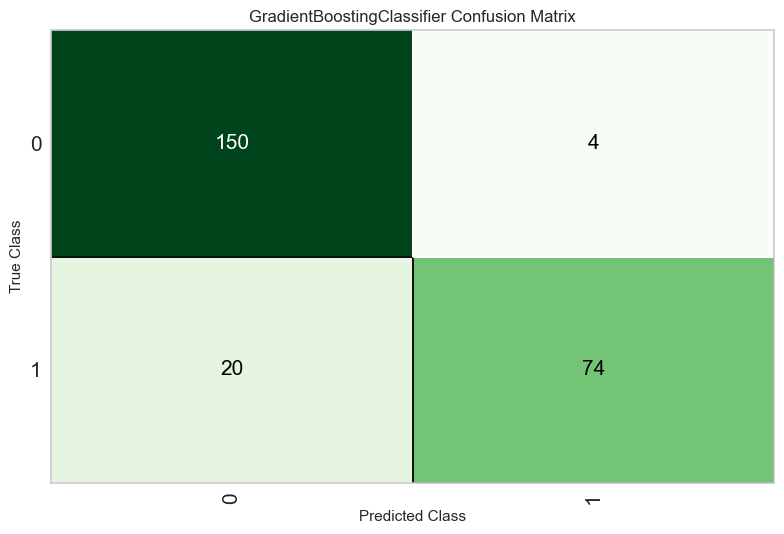

Text(0.5, 1.0, 'Confusion Matrix')

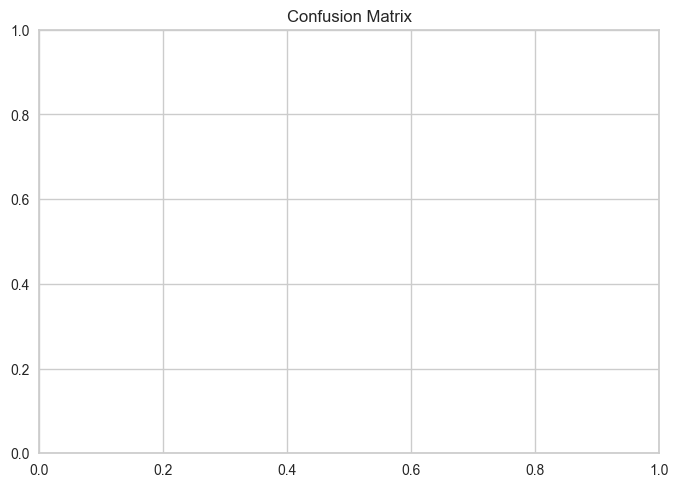

In [10]:
plot_model(final_model, plot='confusion_matrix', save=False)
plt.title('Confusion Matrix')

**9. Predict Survival Probabilities for Specific Groups**

9.1 Survival Probabilities by Marital Status

Define Example Groups

- A custom dataset (marital_groups) is created to represent different marital statuses and passenger groups.

In [11]:
marital_groups = pd.DataFrame({
    'sex': [1, 0, 1, 0],  # Male, Female, Male, Female
    'age': [30, 25, 50, 35],  # Adults
    'pclass': [1, 2, 3, 3],  # First, Second, Third classes
    'sibsp': [1, 0, 1, 0],  # Siblings/Spouse
    'parch': [1, 0, 1, 0],  # Parents/Children
    'fare': [80, 30, 10, 20],  # Approximate fares
    'embarked': [0, 1, 2, 2],  # Embarked from C, Q, S
    'married': [1, 0, 1, 0]  # Marital status
})



Ensure Feature Alignment

- The custom dataset is aligned with the original training dataset's features to ensure compatibility with the model.

In [12]:
expected_columns = list(titanic_df.drop(columns=['survived']).columns)
marital_groups = marital_groups[expected_columns]



Make Predictions


- The trained model is used to predict survival probabilities for the defined groups.

In [13]:
marital_predictions = predict_model(final_model, data=marital_groups)



Add Group Labels

- A Group column is created to label each group for better visualization.

In [14]:
marital_predictions['Group'] = marital_groups.apply(
    lambda row: f"Sex: {row['sex']}, Married: {row['married']}, Pclass: {row['pclass']}", axis=1
)



Plot Survival Probabilities


- A pie chart visualizes the survival probabilities for different marital status groups.

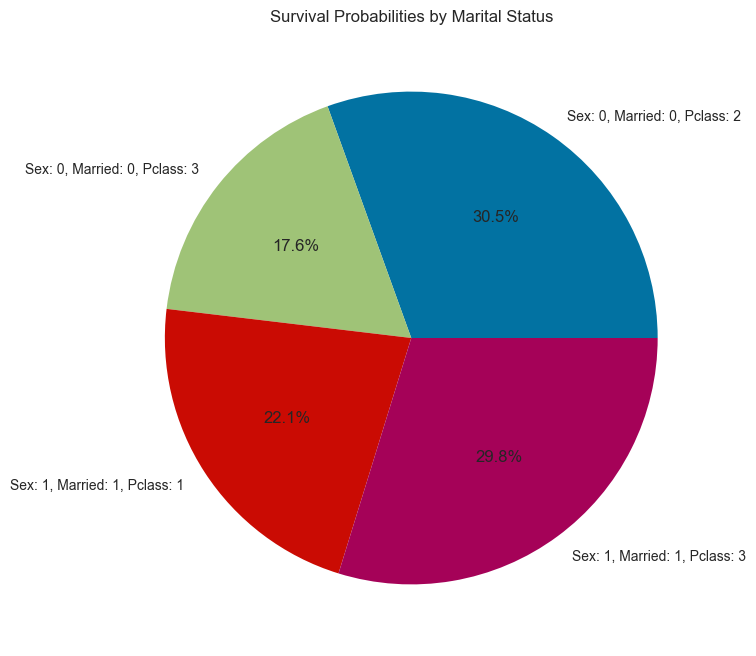

In [15]:
marital_predictions.groupby('Group')['prediction_score'].mean().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(8, 8),
    title='Survival Probabilities by Marital Status'
)
plt.ylabel('')
plt.show()

9.2 Survival Probabilities by Age Groups

Define Example Groups

- A second custom dataset (age_groups) is created to represent different age ranges and passenger groups.

In [16]:
age_groups = pd.DataFrame({
    'sex': [1, 0, 1, 0],  # Male, Female, Male, Female
    'age': [18, 65, 8, 50],  # Teen, Senior, Child, Adult
    'pclass': [3, 1, 2, 1],  # Classes
    'sibsp': [0, 1, 0, 1],  # Siblings/Spouse
    'parch': [0, 0, 1, 2],  # Parents/Children
    'fare': [10, 100, 15, 80],  # Approximate fares
    'embarked': [2, 0, 1, 0],  # Embarked from S, C, Q, C
    'married': [0, 1, 0, 1]  # Marital status
})



Ensure Feature Alignment

- The custom dataset is aligned with the original training dataset's features to ensure compatibility with the model.

In [17]:
age_groups = age_groups[expected_columns]



Make Predictions

- The trained model is used to predict survival probabilities for the defined age groups.

In [18]:
age_predictions = predict_model(final_model, data=age_groups)



Add Group Labels

- A Group column is created to label each group for better visualization.

In [19]:
age_predictions['Group'] = age_groups.apply(
    lambda row: f"Sex: {row['sex']}, Age: {row['age']}, Pclass: {row['pclass']}", axis=1
)



Plot Survival Probabilities

- A scatter plot visualizes the survival probabilities for different age groups.

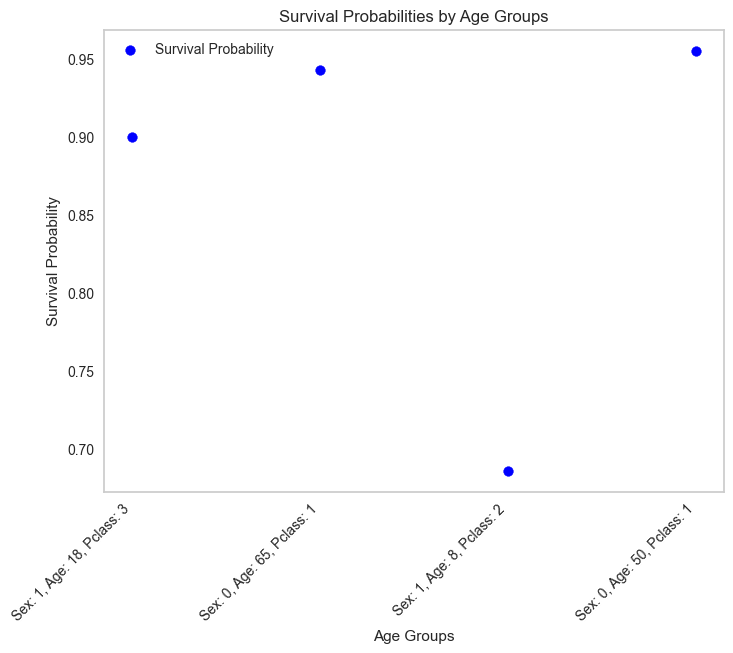

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(age_predictions['Group'], age_predictions['prediction_score'], color='blue', label='Survival Probability')
plt.title('Survival Probabilities by Age Groups')
plt.ylabel('Survival Probability')
plt.xlabel('Age Groups')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid()
plt.show()

**10. Save the Final Model**

- The final trained and tuned model is saved to a file (pycaret_titanic_model.pkl) for future use.

In [21]:
save_model(final_model, '../data/pycaret_titanic_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pclass', 'sex', 'age', 'sibsp',
                                              'parch', 'fare', 'embarked',
                                              'married'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper...
                                             criterion='friedman_mse', init=None,
 

**Outcome**
- Confusion matrix visualization evaluates the model's performance.
- Custom datasets (marital_groups and age_groups) provide insights into survival probabilities for specific groups.
- The trained model is saved for deployment or further analysis.